In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from ipynb.fs.full.process import get_binary_data

In [32]:
X, Y = get_binary_data()
X, Y = shuffle(X, Y)

Xtrain = X[: -100]
Ytrain = Y[: -100]

Xtest = X[-100:]
Ytest = Y[-100:]

D = X.shape[1]
W = np.random.randn(D)
b= 0 #bias term

In [33]:
def sigmoid(a) :
    return 1 / (1 + np.exp(-a))

def classification_rate(X, Y) :
    return np.mean(X == Y)

def cross_entropy(T, pY) :
    return -np.mean(T * np.log(pY) + (1 - T) * np.log(1 - pY))

def cross_entropy_2(T, Y) :
    E = 0
    for i in range(len(T)) :
        if T[i] == 1 :
            E -= np.log(Y[i])
        else :
            E -= np.log(1 - Y[i])
    return E

def forward(X, W, b) : 
    return sigmoid(X.dot(W) + b)

0 0.9919523059995621 1.041045462561659
1000 0.21876913485272517 0.09216230570856108
2000 0.21824110931132626 0.08748385203098664
3000 0.21822242802763597 0.0865727423876353
4000 0.21822163252895738 0.08638231736264157
5000 0.2182215976003902 0.08634226974063791
6000 0.21822159605754476 0.08633384385942079
7000 0.21822159598931112 0.08633207132958531
8000 0.21822159598629273 0.0863316984838425
9000 0.21822159598615937 0.08633162006021415
The final train classification rate : 0.9697986577181208
The final test classification rate : 0.98


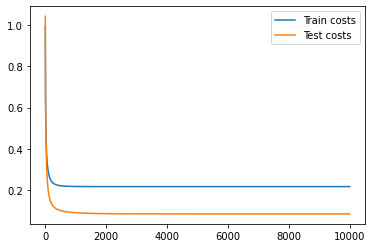

In [34]:
train_costs = []
test_costs = []

learning_rate = 0.001

for i in range(10000) :
    pY_given_X_train = forward(Xtrain, W, b)
    pY_given_X_test = forward(Xtest, W, b)
    
    c_train = cross_entropy(Ytrain, pY_given_X_train)
    c_test = cross_entropy(Ytest, pY_given_X_test)
    
    train_costs.append(c_train)
    test_costs.append(c_test)
    
    W -= learning_rate * np.dot(Xtrain.T, (pY_given_X_train - Ytrain))
    b -= learning_rate * (pY_given_X_train - Ytrain).sum()
    
    if i % 1000 == 0:
        print (i, c_train, c_test)
        
print ('The final train classification rate :', classification_rate(Ytrain, np.round(pY_given_X_train)))
print ('The final test classification rate :', classification_rate(Ytest, np.round(pY_given_X_test)))

legend1, = plt.plot(train_costs, label = 'Train costs')
legend2, = plt.plot(test_costs, label = 'Test costs')
plt.legend()
plt.show()

In [22]:
b

-0.8944045753168995